In [4]:
import pandas as pd
import numpy as np
td_2011 = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/2011+trip+data/2011-capitalbikeshare-tripdata.csv')
td_2011_copy = td_2011.copy()  

In [5]:
td_2011.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [6]:
#hunting nans
nan_indices = td_2011.isna()
print(nan_indices.any()) 

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool


In [7]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=td_2011.isna().sum().sum()
print(nan_count)

0


In [8]:
#hunting duplicates, none found
duplicateRows = td_2011[td_2011.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [Duration, Start date, End date, Start station number, Start station, End station number, End station, Bike number, Member type]
Index: []


In [9]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
td_2011['Start date'] = pd.to_datetime(td_2011['Start date'])
td_2011['End date'] = pd.to_datetime(td_2011['End date'])
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  int64         
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  int64         
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 84.2+ MB


In [10]:
td_2011['Duration_sec'] = td_2011['Duration']
td_2011.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233


In [11]:
td_2011[["Start station number", "End station number"]] = td_2011[["Start station number", "End station number"]].astype("category")

In [12]:
print(td_2011[["Start station number", "End station number", 'Duration', 'Bike number']].dtypes)

Start station number    category
End station number      category
Duration                   int64
Bike number               object
dtype: object


In [13]:
td_2011[["Bike number"]] = td_2011[["Bike number"]].astype("str")
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  category      
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  category      
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
 9   Duration_sec          1226767 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 79.6+ MB


In [14]:
def add_underscores(td_2011):
    td_2011.columns = td_2011.columns.str.replace(' ', '_')
    return td_2011
td_2011 = add_underscores(td_2011)


In [15]:
td_2011.columns = td_2011.columns.str.lower()
td_2011

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member,300
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member,387
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member,261
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member,2060


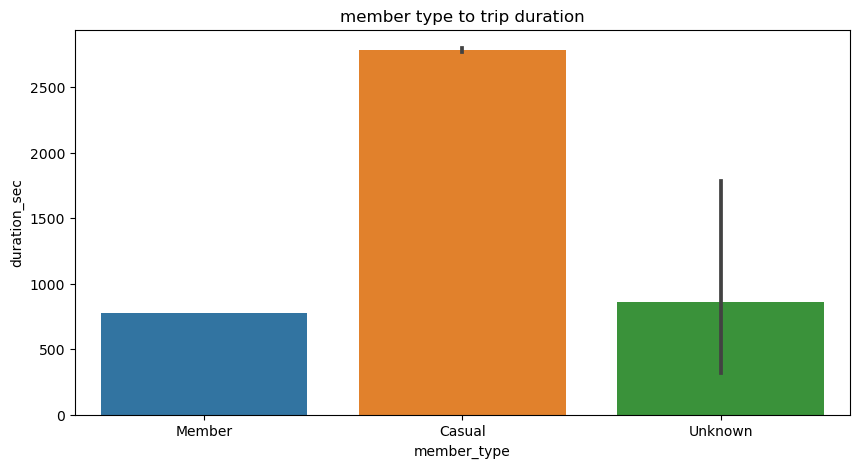

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=td_2011, x='member_type', y='duration_sec')
ax.set(title="member type to trip duration")
plt.show()

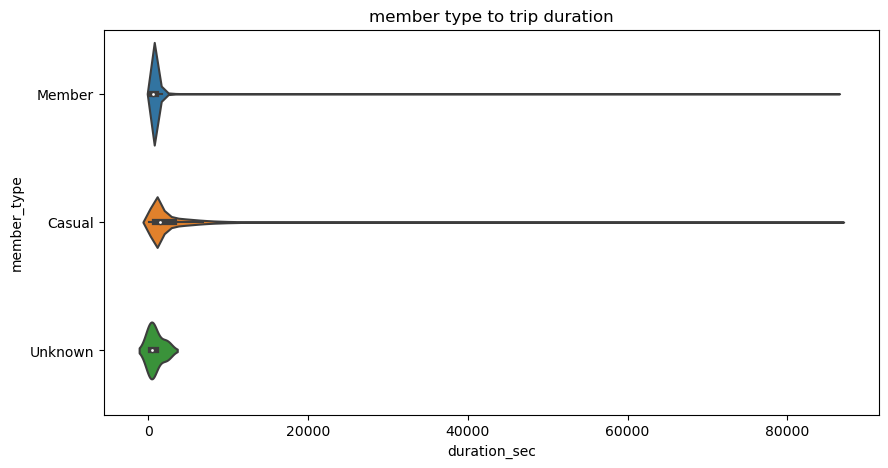

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
bike_no = td_2011[td_2011['bike_number']=='W00675']
sns.violinplot(data=td_2011, x='duration_sec', y='member_type')
ax.set(title="member type to trip duration")
plt.show()

In [18]:
bike_no = td_2011[td_2011['bike_number']=='W00675']
bike_no

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
45,451,2011-01-01 01:46:59,2011-01-01 01:54:31,31101,14th & V St NW,31207,Georgia Ave and Fairmont St NW,W00675,Member,451
183,524,2011-01-01 11:32:35,2011-01-01 11:41:20,31207,Georgia Ave and Fairmont St NW,31104,Adams Mill & Columbia Rd NW,W00675,Member,524
368,634,2011-01-01 13:41:17,2011-01-01 13:51:51,31104,Adams Mill & Columbia Rd NW,31207,Georgia Ave and Fairmont St NW,W00675,Member,634
1029,387,2011-01-02 09:40:24,2011-01-02 09:46:52,31207,Georgia Ave and Fairmont St NW,31101,14th & V St NW,W00675,Member,387
...,...,...,...,...,...,...,...,...,...,...
1212742,641,2011-12-24 11:25:28,2011-12-24 11:36:10,31230,Metro Center / 12th & G St NW,31203,14th & Rhode Island Ave NW,W00675,Member,641
1214377,2857,2011-12-26 10:22:00,2011-12-26 11:09:38,31203,14th & Rhode Island Ave NW,31620,5th & F St NW,W00675,Casual,2857
1215511,572,2011-12-26 23:54:48,2011-12-27 00:04:20,31620,5th & F St NW,31108,4th & M St SW,W00675,Member,572
1215636,897,2011-12-27 07:43:22,2011-12-27 07:58:19,31108,4th & M St SW,31222,New York Ave & 15th St NW,W00675,Member,897


In [19]:
td_2011['start_station_number'].value_counts()

31200    49093
31201    32884
31623    32058
31104    29964
31214    28160
         ...  
31806        4
31704        1
31708        1
31052        1
31266        1
Name: start_station_number, Length: 144, dtype: int64

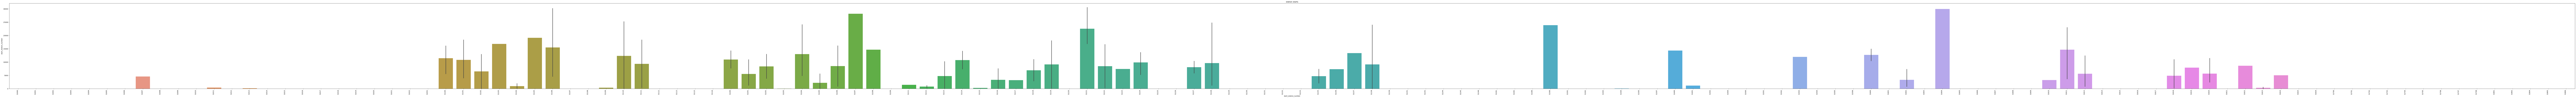

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(300,10))
#ssn_valc = td_2011['start_station_number'].value_counts()
#plot_order = td_2011.groupby('start_station_number')[ssn_valc].sum().sort_values(ascending=False).index.values
sns.barplot(data=td_2011, x='start_station_number', y=td_2011['start_station_number'].value_counts())
ax.set(title="station starts")
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.show()



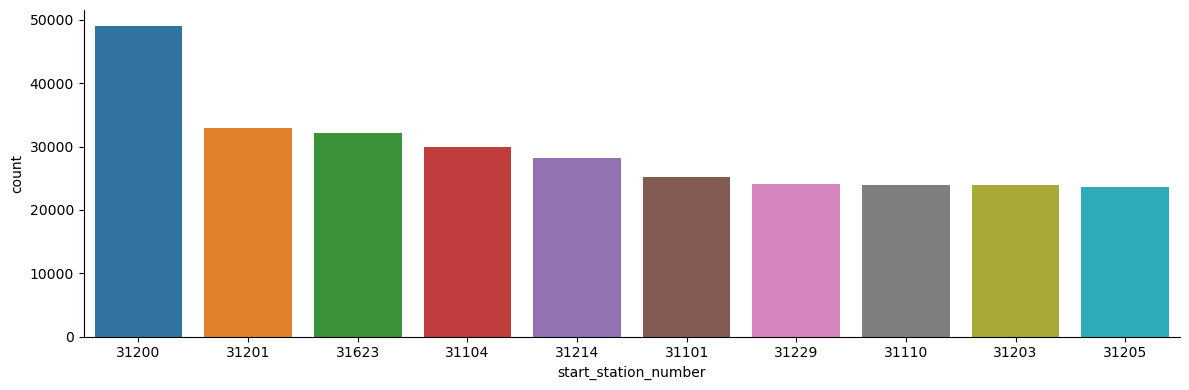

In [21]:
#top 10 starting stations

sns.catplot(data=td_2011, kind='count', x='start_station_number', height=4, aspect=3,  order=pd.value_counts(td_2011['start_station_number']).iloc[:10].index)
#order= td_2011['start_station_number'].value_counts().index,

focus on rebalancing 
#costs start here:
#https://www.sciencedirect.com/science/article/abs/pii/S0377221718302030


## notice 31229 and 31228. 31229 is a top 10 starting station, but not ending. 31228 is a top 10 ending station, but not starting. 


'''Clearly, the repositioning of bikes from stations too full to stations too empty is a huge operational overhead. 
In fact, for Vélib system in Paris, the average cost of a single repositioning for a single bike is $3 (DeMaio, 2009). 
According to a report by New York City Department of City Planning (2009) based on different case studies, 
the total capital cost for a bike sharing system varies from $3000/bike to $4400/bike in different cities. 
then averaged across programs, the yearly operating cost for a bike share program is around $1600/bike.'''

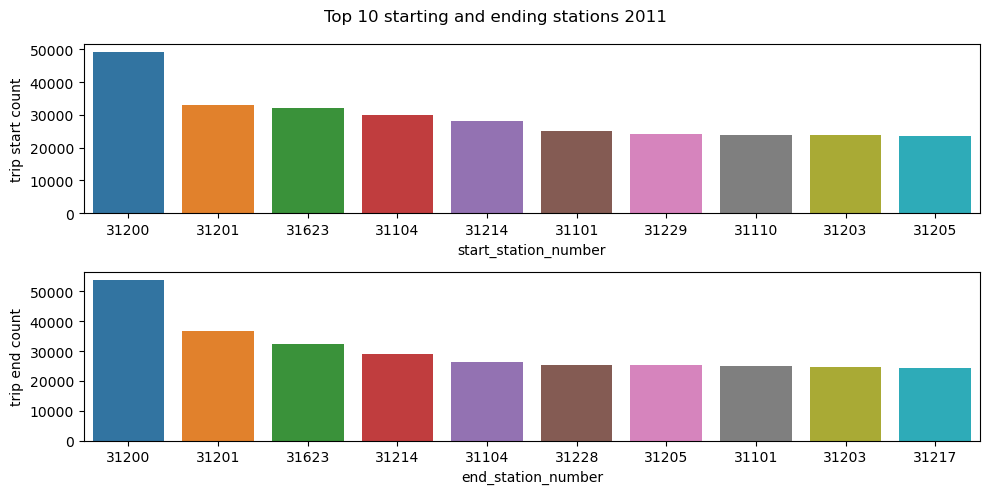

In [22]:
#top 10 starting and ending stations 2011

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=td_2011,  x='start_station_number', order=pd.value_counts(td_2011['start_station_number']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=td_2011,  x='end_station_number', order=pd.value_counts(td_2011['end_station_number']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011")
plt.tight_layout()
plt.show()


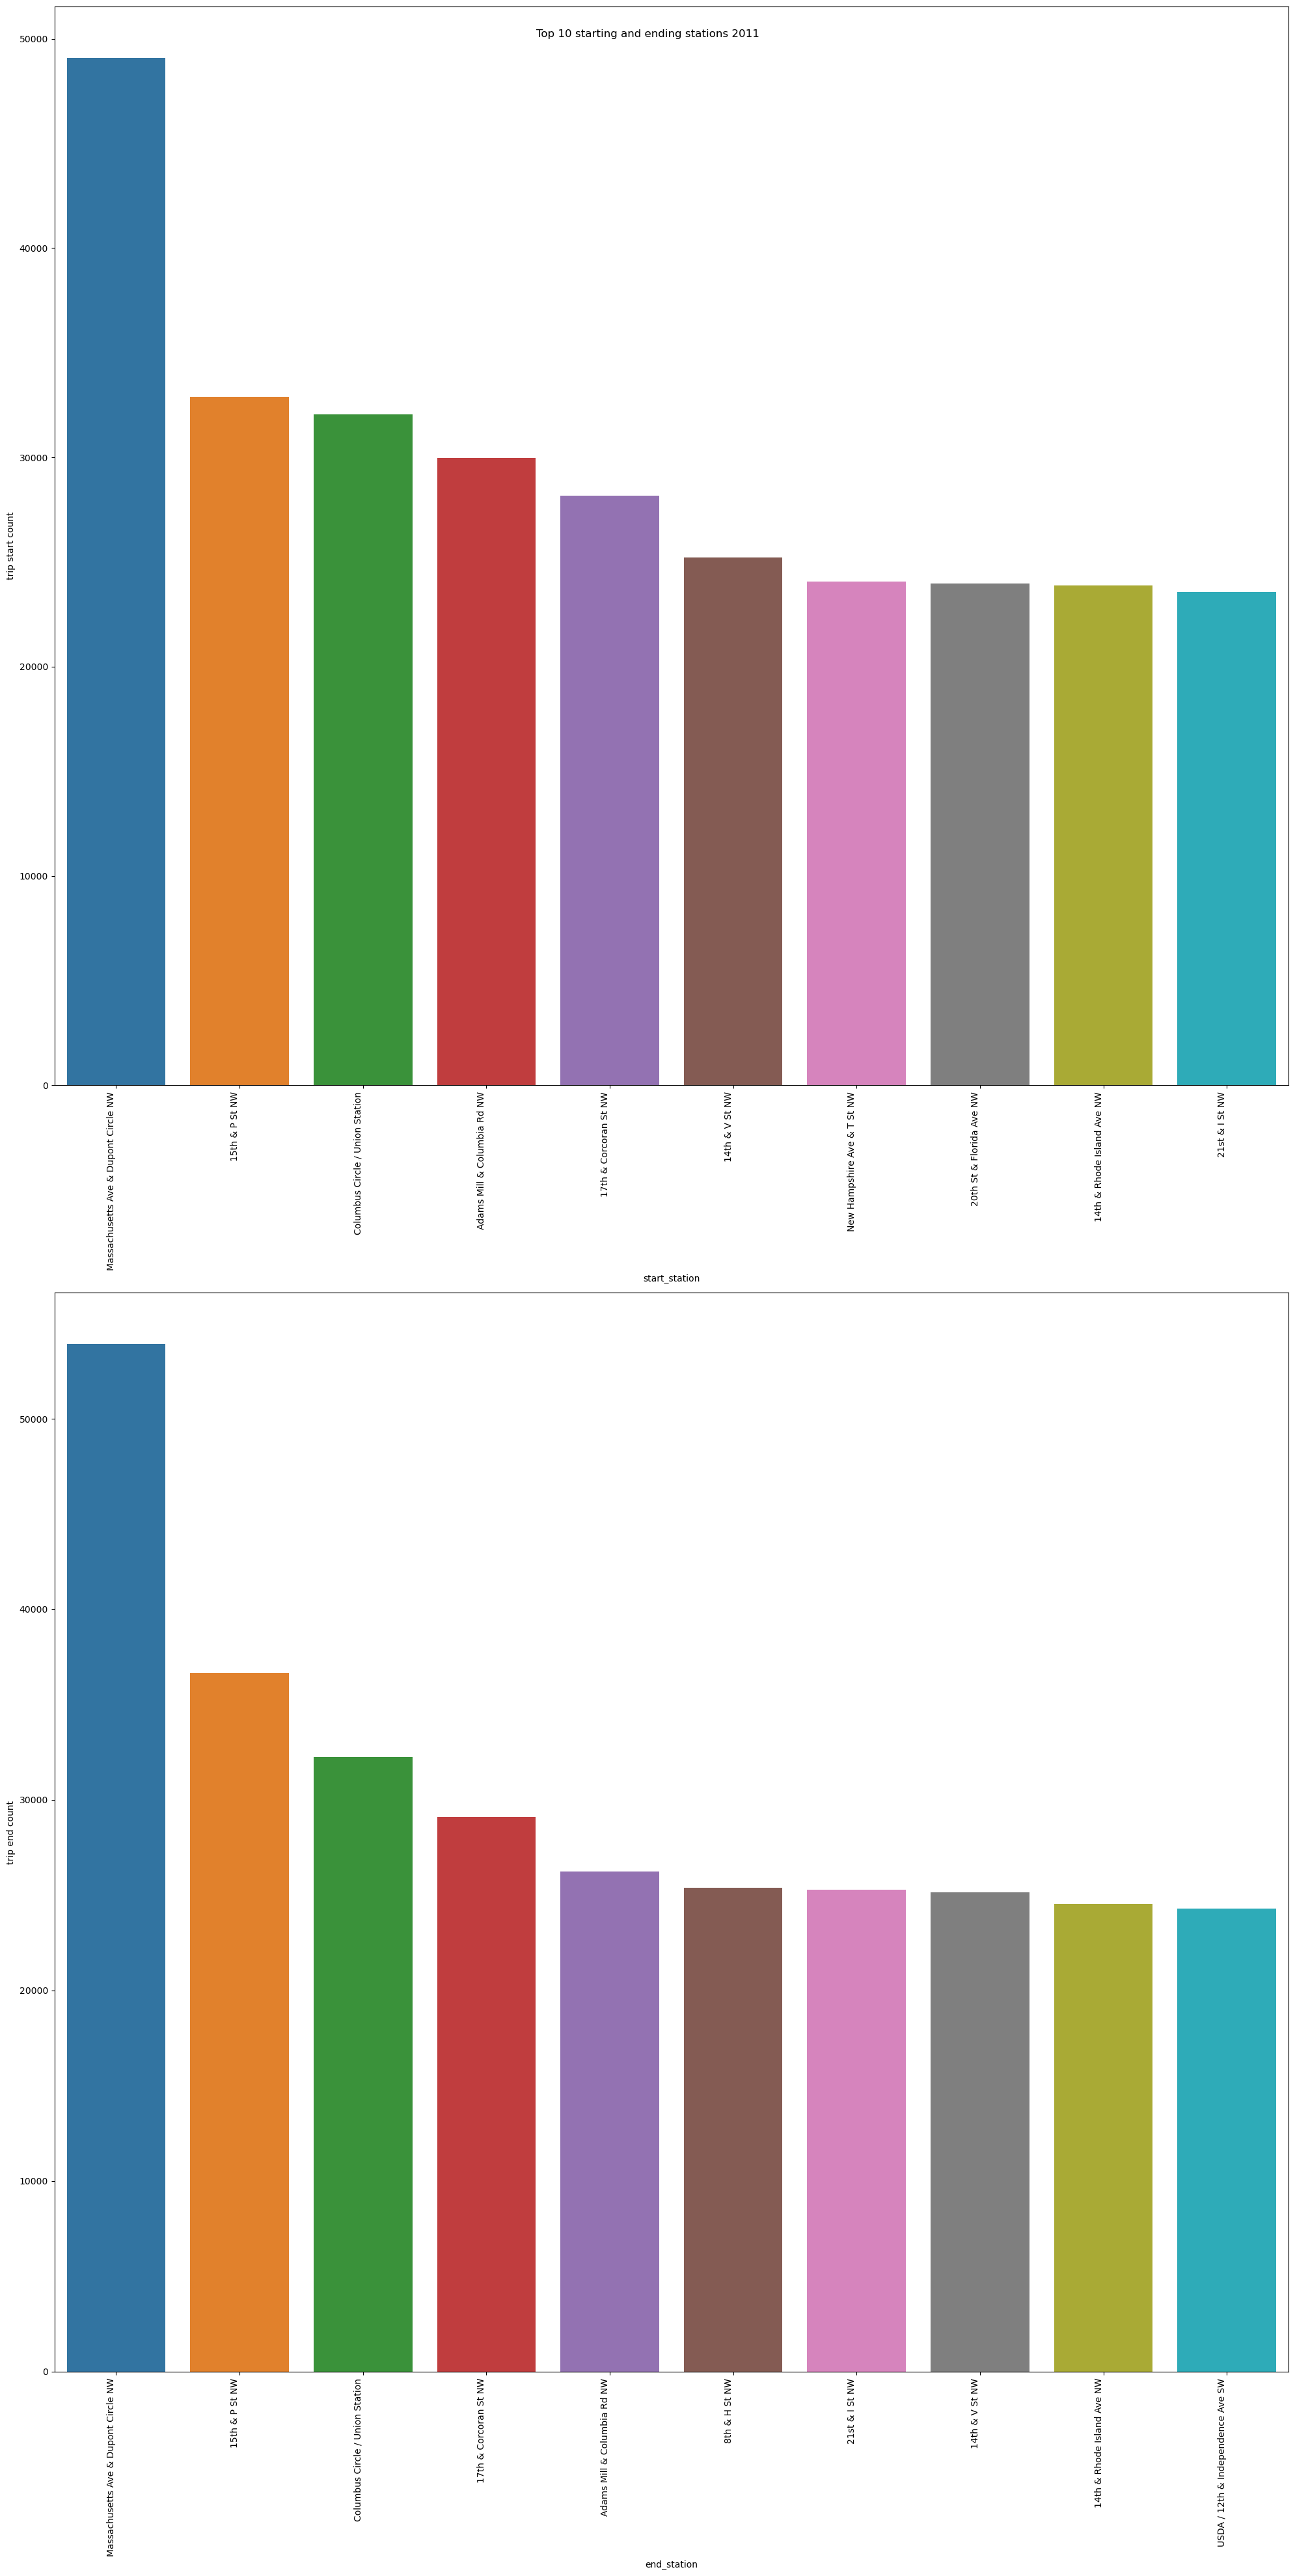

In [23]:
##top 10 in 2011 by name

fig, ax = plt.subplots(2,1, figsize=(20,40))

sns.countplot(data=td_2011,  x='start_station', order=pd.value_counts(td_2011['start_station']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=td_2011,  x='end_station', order=pd.value_counts(td_2011['end_station']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011")
ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.tight_layout()
plt.show()

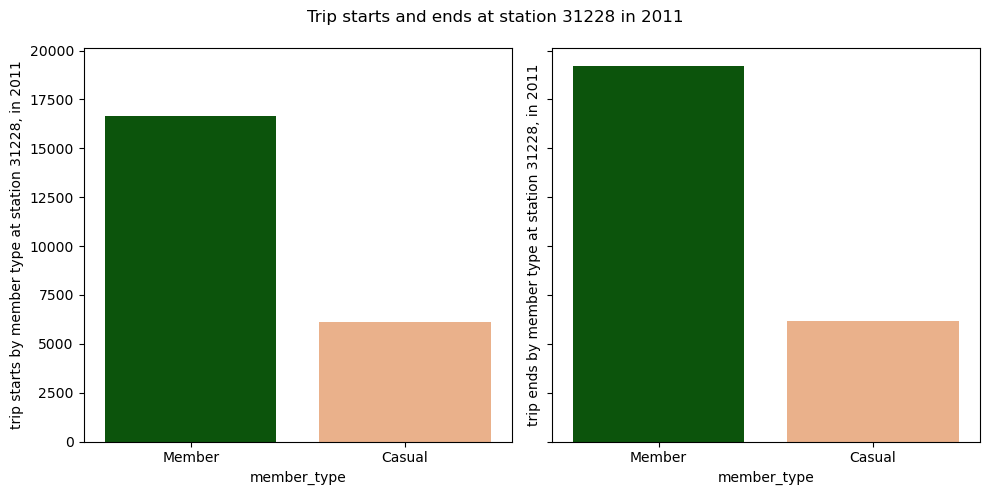

In [24]:
#station 31228 in 2011
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))

sns.countplot(data=td_2011[td_2011['start_station_number'] == 31228], x='member_type', ax=ax[0], palette=['#006000',"#FAAE7B"]).set(ylabel='trip starts by member type at station 31228, in 2011')

sns.countplot(data=td_2011[td_2011['end_station_number'] == 31228], x='member_type', ax=ax[1], palette=['#006000',"#FAAE7B"]).set(ylabel='trip ends by member type at station 31228, in 2011')
fig.suptitle("Trip starts and ends at station 31228 in 2011")
plt.tight_layout()

plt.show()


now plot the top 10 stations by user type
casuals use which 10 stations the most?
members use which 10 stations the most?
top10 where usertype == casual or member

In [25]:
#importing the 2012 dataset

import os

# Get CSV files list from a folder
os.chdir('/Users/cd/Documents/Code Academy Berlin/Project 3/2012+trip+data/2012-capitalbikeshare-tripdata')
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
dfs = []

for csv in csv_files:
    df = pd.read_csv(csv)
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)




In [27]:
td_2012 = final_df
td_2012_copy = td_2012.copy()

In [28]:
td_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028911 entries, 0 to 2028910
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 139.3+ MB


In [29]:
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   duration              1226767 non-null  int64         
 1   start_date            1226767 non-null  datetime64[ns]
 2   end_date              1226767 non-null  datetime64[ns]
 3   start_station_number  1226767 non-null  category      
 4   start_station         1226767 non-null  object        
 5   end_station_number    1226767 non-null  category      
 6   end_station           1226767 non-null  object        
 7   bike_number           1226767 non-null  object        
 8   member_type           1226767 non-null  object        
 9   duration_sec          1226767 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 79.6+ MB


In [30]:
#hunting nans
nan_indices = td_2012.isna()
print(nan_indices.any()) 

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool


In [31]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=td_2012.isna().sum().sum()
print(nan_count)

0


In [32]:
#hunting duplicates, none found
duplicateRows = td_2012[td_2012.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [Duration, Start date, End date, Start station number, Start station, End station number, End station, Bike number, Member type]
Index: []


In [33]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
td_2012['Start date'] = pd.to_datetime(td_2012['Start date'])
td_2012['End date'] = pd.to_datetime(td_2012['End date'])
td_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028911 entries, 0 to 2028910
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 139.3+ MB


In [34]:
td_2012['Duration_sec'] = td_2012['Duration']
td_2012[["Start station number", "End station number"]] = td_2012[["Start station number", "End station number"]].astype("category")
td_2012[["Bike number"]] = td_2012[["Bike number"]].astype("str")
def add_underscores(td_2012):
    td_2012.columns = td_2012.columns.str.replace(' ', '_')
    return td_2012
td_2012 = add_underscores(td_2012)
td_2012.columns = td_2012.columns.str.lower()
td_2012.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028911 entries, 0 to 2028910
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   duration              int64         
 1   start_date            datetime64[ns]
 2   end_date              datetime64[ns]
 3   start_station_number  category      
 4   start_station         object        
 5   end_station_number    category      
 6   end_station           object        
 7   bike_number           object        
 8   member_type           object        
 9   duration_sec          int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 131.6+ MB


In [35]:
combi_td1112 = pd.concat([td_2011, td_2012], ignore_index=True)
combi_td1112

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
3255673,166,2012-06-30 23:58:05,2012-07-01 00:00:52,31212,21st & M St NW,31246,M St & Pennsylvania Ave NW,W20089,Member,166
3255674,1374,2012-06-30 23:58:23,2012-07-01 00:21:18,31202,14th & R St NW,31622,13th & D St NE,W01244,Casual,1374
3255675,469,2012-06-30 23:58:30,2012-07-01 00:06:19,31101,14th & V St NW,31212,21st & M St NW,W00145,Member,469
3255676,977,2012-06-30 23:59:03,2012-07-01 00:15:21,31611,13th & H St NE,31102,11th & Kenyon St NW,W01181,Member,977


In [36]:
combi_td1112.sort_values(by='start_date', inplace = True)
combi_td1112

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
2688841,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,8630
2688842,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,418
2688843,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,384
2688844,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,448


now plot the top 10 stations by user type
casuals use which 10 stations the most?
members use wich 10 stations the most?
top10 where usertype == casual or member

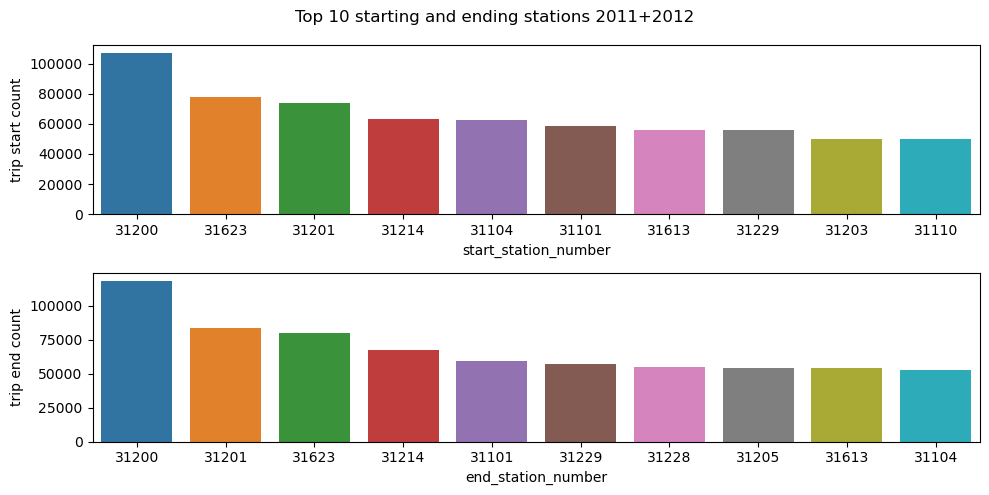

In [37]:
#top 10 starting and ending stations 2011-2012: focus on rebalancing 
#costs start here:
#https://www.sciencedirect.com/science/article/abs/pii/S0377221718302030


##

# Clearly, the repositioning of bikes from stations too full to stations too empty is a huge operational overhead. 
#In fact, for Vélib system in Paris, the average cost of a single repositioning for a single bike is $3 (DeMaio, 2009). 
#According to a report by New York City Department of City Planning (2009) based on different case studies, 
#the total capital cost for a bike sharing system varies from $3000/bike to $4400/bike in different cities. 
#When averaged across programs, the yearly operating cost for a bike share program is around $1600/bike.

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=combi_td1112,  x='start_station_number', order=pd.value_counts(combi_td1112['start_station_number']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=combi_td1112,  x='end_station_number', order=pd.value_counts(combi_td1112['end_station_number']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011+2012")
plt.tight_layout()
plt.show()

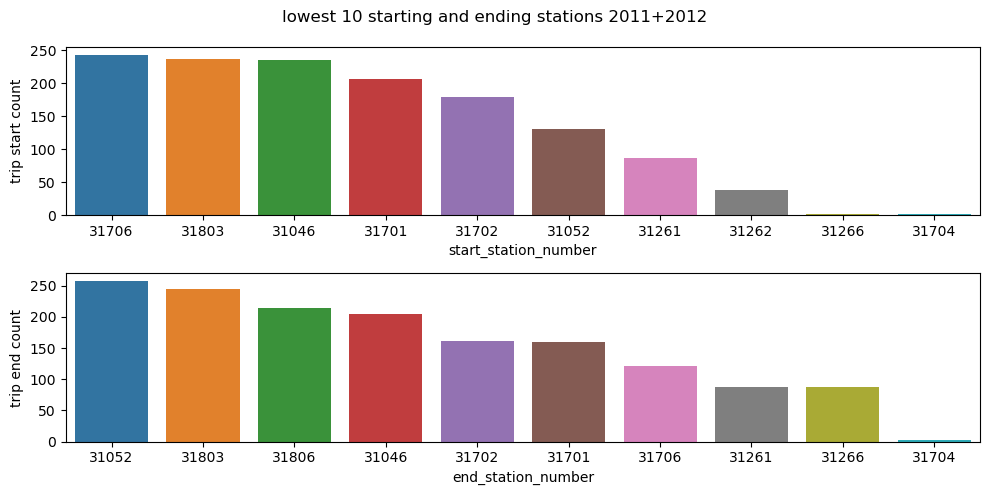

In [38]:
#lowest 10 stations

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=combi_td1112,  x='start_station_number', order=pd.value_counts(combi_td1112['start_station_number']).tail(10).index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=combi_td1112,  x='end_station_number', order=pd.value_counts(combi_td1112['end_station_number']).tail(10).index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("lowest 10 starting and ending stations 2011+2012")
plt.tight_layout()
plt.show()

In [39]:
##hunting potentially removed stations from the lowest values above
#31266, 31704, 31261, all disappear from records during 2011

df1= combi_td1112[combi_td1112['end_station_number'] == 31702]
df1

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
10643,1851,2011-01-09 16:01:59,2011-01-09 16:32:50,31700,Good Hope & Naylor Rd SE,31702,Randle Circle & Minnesota Ave SE,W00629,Member,1851
34059,1287,2011-01-29 09:39:44,2011-01-29 10:01:11,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W00412,Member,1287
40885,754,2011-02-03 11:41:26,2011-02-03 11:54:01,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W00558,Member,754
42717,713,2011-02-04 14:51:48,2011-02-04 15:03:42,31802,Good Hope Rd & MLK Ave SE,31702,Randle Circle & Minnesota Ave SE,W00568,Member,713
43937,833,2011-02-05 14:42:01,2011-02-05 14:55:54,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W01067,Member,833
...,...,...,...,...,...,...,...,...,...,...
2405994,2283,2012-10-28 12:17:09,2012-10-28 12:55:13,31625,3rd & G St SE,31702,Randle Circle & Minnesota Ave SE,W01255,Member,2283
2552336,1441,2012-11-28 13:29:56,2012-11-28 13:53:58,31209,1st & N St SE,31702,Randle Circle & Minnesota Ave SE,W01339,Member,1441
2645421,4248,2012-12-16 01:11:59,2012-12-16 02:22:48,31402,14th St Heights / 14th & Crittenden St NW,31702,Randle Circle & Minnesota Ave SE,W01144,Casual,4248
2664416,468,2012-12-20 05:18:40,2012-12-20 05:26:29,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W01371,Member,468


#31266, 31704, 31261, all disappear from records during 2011

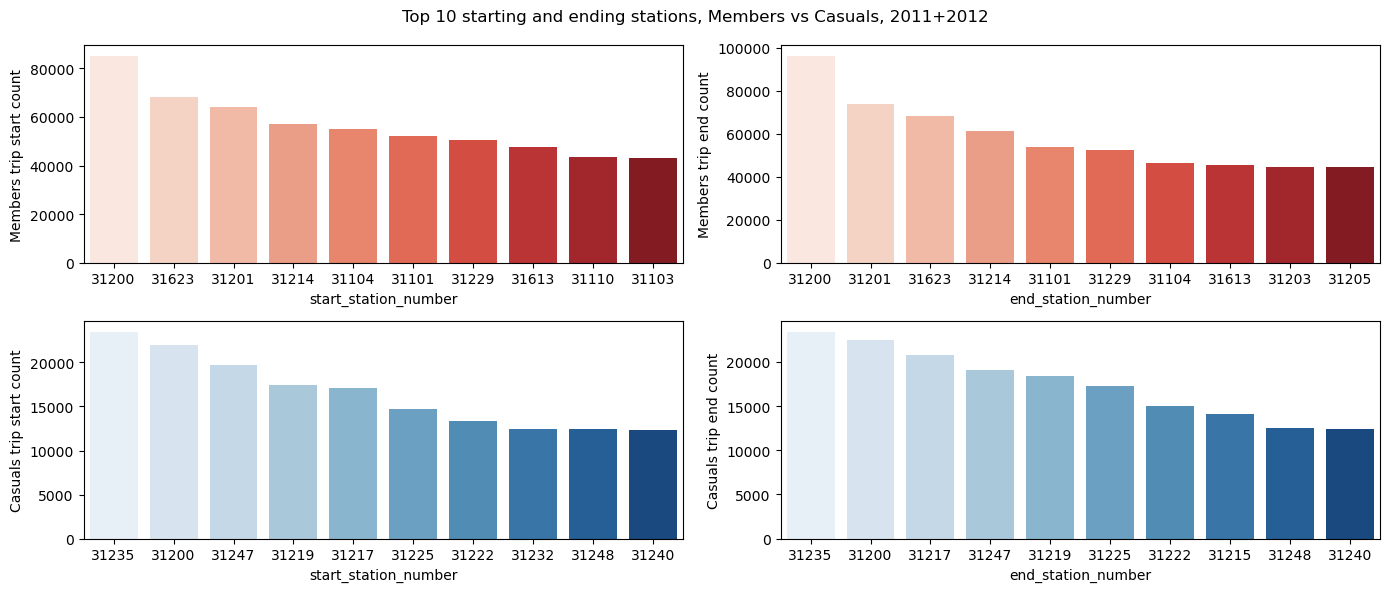

In [40]:
#top 10 stations for members vs casuals, starts and ends
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize=(14,6))
casual_df=combi_td1112[combi_td1112['member_type'] == 'Casual']
member_df=combi_td1112[combi_td1112['member_type'] == 'Member']


sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Member'],  x='start_station_number', order=pd.value_counts(member_df['start_station_number']).iloc[:10].index, ax=ax[0,0], palette='Reds', dodge=True).set(ylabel='Members trip start count')
sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Member'],  x='end_station_number', order=pd.value_counts(member_df['end_station_number']).iloc[:10].index, ax=ax[0,1], palette='Reds', dodge=True).set(ylabel='Members trip end count')

sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='start_station_number', order=pd.value_counts(casual_df['start_station_number']).iloc[:10].index, ax=ax[1,0], palette='Blues').set(ylabel='Casuals trip start count')
sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='end_station_number', order=pd.value_counts(casual_df['end_station_number']).iloc[:10].index, ax=ax[1,1], palette='Blues').set(ylabel='Casuals trip end count')
fig.suptitle("Top 10 starting and ending stations, Members vs Casuals, 2011+2012")
plt.tight_layout()
plt.show()

#https://stackoverflow.com/questions/57601156/change-axis-along-which-seaborn-applies-color-palette ^^^


In [41]:
#top 7 member start stations
pd.value_counts(member_df['start_station_number']).iloc[:7]


31200    85223
31623    68023
31201    64285
31214    57301
31104    55241
31101    52065
31229    50473
Name: start_station_number, dtype: int64

In [42]:
#bottom 10 all start stations
pd.value_counts(combi_td1112['start_station_number']).tail(10)

31706    243
31803    237
31046    236
31701    206
31702    179
31052    130
31261     87
31262     38
31266      1
31704      1
Name: start_station_number, dtype: int64

In [41]:
#folium use
import folium

m = folium.Map(location=(45.5236, -122.6750))
m

In [42]:
#playing with folium
m = folium.Map([45.35, -121.6972], zoom_start=12)

folium.Marker(
    location=[45.3288, -121.6625],
    tooltip="Click me!",
    popup="Mt. Hood Meadows",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    tooltip="Click me!",
    popup="Timberline Lodge",
    icon=folium.Icon(color="green"),
).add_to(m)

m

In [43]:
#playing with folium
m = folium.Map(location=[-71.38, -73.9], zoom_start=11)

trail_coordinates = [
    (-71.351871840295871, -73.655963711222626),
    (-71.374144382613707, -73.719861619751498),
    (-71.391042575973145, -73.784922248007007),
    (-71.400964450973134, -73.851042243124397),
    (-71.402411391077322, -74.050048183880477),
]

folium.PolyLine(trail_coordinates, tooltip="Coast").add_to(m)

m


In [43]:
#first need to find all unique instances of station number and station name
namenum_df = combi_td1112.filter(['start_station_number','start_station'], axis=1)
print(namenum_df)

         start_station_number  \
0                       31620   
1                       31105   
2                       31400   
3                       31111   
4                       31104   
...                       ...   
2688841                 31619   
2688842                 31101   
2688843                 31101   
2688844                 31613   
2688845                 31223   

                                             start_station  
0                                            5th & F St NW  
1                                     14th & Harvard St NW  
2                           Georgia & New Hampshire Ave NW  
3                                           10th & U St NW  
4                              Adams Mill & Columbia Rd NW  
...                                                    ...  
2688841          Lincoln Park / 13th & East Capitol St NE   
2688842                                     14th & V St NW  
2688843                                     14th & V S

In [44]:
#make new DF with only unique station number values
station_numbers = namenum_df['start_station_number'].unique()
station_numbers = pd.DataFrame({'start_station_number': station_numbers})
station_numbers

,start_station_number
0,31620
1,31105
2,31400
3,31111
4,31104
...,...
189,31044
190,31046
191,31051
192,31050


In [45]:
nnum_dc2=nnum_dc.head(5)
nnum_dc2

NameError: name 'nnum_dc' is not defined

In [46]:
stations_df = namenum_df['start_station'].unique()

stations_df = pd.DataFrame({'add': stations_df})

stations_df

,add
0,5th & F St NW
1,14th & Harvard St NW
2,Georgia & New Hampshire Ave NW
3,10th & U St NW
4,Adams Mill & Columbia Rd NW
...,...
189,King St & Patrick St
190,Henry St & Pendleton St
191,Arlington Blvd & N Queen St
192,Barton St & 10th St N


In [48]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import geopy
import json

#After we import all the packages we need, we should open our data and geocode addresses 
# inside it.
#  
#We need Nominatim module from geopy here. 
#After we define our geocoder, we need to loop over every name and get latitude & longitude 
# variables.
#dc lat long: 38.89996347562683, -77.03516744211487

#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [47]:
nnum_dc2['add']

NameError: name 'nnum_dc2' is not defined

In [48]:
nnum_dc


NameError: name 'nnum_dc' is not defined

In [51]:
#running a geopy geolocation on the df with DC added to it.
#Importing the required modules
# import pandas as pd
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
 
# #Creating a dataframe with address of locations we want to reterive
# # locat = ['Coorg, Karnataka' , 'Khajjiar, Himachal Pradesh',
# #          'Chail, Himachal Pradesh' , 'Pithoragarh, Uttarakhand','Munnar, Kerala']
# # df = pd.DataFrame({'add': locat})

# # #Creating an instance of Nominatim Class
# geolocator = Nominatim(user_agent="my_request", timeout=None)
 
# # #applying the rate limiter wrapper
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# # #Applying the method to pandas DataFrame
# nnum_dc['location'] = nnum_dc['add'].apply(geocode)
# nnum_dc['Lat'] = nnum_dc['location'].apply(lambda x: x.latitude if x else None)
# nnum_dc['Lon'] = nnum_dc['location'].apply(lambda x: x.longitude if x else None)
 
# nnum_dc

KeyboardInterrupt: 

In [ ]:
# nnum_dc.to_csv('DC_List_Lat_Long.csv')

In [ ]:
# #running a geopy geolocation on the df without DC added to it -- secret is to set timeout=None
# #Importing the required modules
# import pandas as pd
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
 
# #Creating a dataframe with address of locations we want to reterive

# # #Creating an instance of Nominatim Class
# geolocator = Nominatim(user_agent="my_request", timeout=None)
 
# # #applying the rate limiter wrapper
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# # #Applying the method to pandas DataFrame
# stations_df['location'] = stations_df['add'].apply(geocode)
# stations_df['Lat'] = stations_df['location'].apply(lambda x: x.latitude if x else None)
# stations_df['Lon'] = stations_df['location'].apply(lambda x: x.longitude if x else None)
 
# stations_df

In [ ]:
#stations_df.to_csv('Stations_with_latlong.csv')

In [63]:
import pandas as pd
import numpy as np
stations_df7 = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/2012+trip+data/2012-capitalbikeshare-tripdata/station_locations/Stations_with_latlong.csv')
stations_df7_copy = stations_df7.copy() 

In [64]:
stations_df7=stations_df7.drop("Unnamed: 0", axis=1)

In [65]:
stations_df7[stations_df7.isnull().any(axis=1)]

,add,location,Lat,Lon


In [66]:
#out of bounds hunting
out_locs = stations_df7[~stations_df7['Lat'].between(38, 39)]

print (out_locs)

Empty DataFrame
Columns: [add, location, Lat, Lon]
Index: []


In [67]:
stations_df7.loc[77:]

,add,location,Lat,Lon
77,19th St & Constitution Ave NW,"19th St & Constitution Ave NW,Washington, DC 2...",38.892250,-77.042856
78,New York Ave & 15th St NW,"New York Ave & 15th St NW, New York Avenue Nor...",38.899036,-77.033353
79,US Dept of State / Virginia Ave & 21st St NW,"US Dept of State / Virginia Ave & 21st St NW, ...",38.894750,-77.046584
80,12th & Army Navy Dr,"Army Navy Drive, Arlington, Arlington County, ...",38.864799,-77.054339
81,34th St & Wisconsin Ave NW,"Wisconsin Avenue, NW And 34th Street NW (Safew...",38.915840,-77.067723
...,...,...,...,...
189,King St & Patrick St,"King St + Patrick St, King Street, Lyles-Crouc...",38.805452,-77.050451
190,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276
191,Arlington Blvd & N Queen St,"Arlington Blvd & N Queen St, Arlington Bouleva...",38.889335,-77.077725
192,Barton St & 10th St N,"N Barton St & 10th St N, North Barton Street, ...",38.884900,-77.087945


In [213]:
#manual modification station to edit bad latlongs
# stations_df7.at[178,'Lat'] = 38.906545
# stations_df7.at[178, 'Lon'] = -77.051512
# stations_df7.at[178, 'location'] = '24th & N St NW, Washington, DC 20037, USA'
# stations_df7.loc[178:]


,add,location,Lat,Lon
178,24th & N St NW,"24th & N St NW, Washington, DC 20037, USA",38.906545,-77.051512
179,Gallaudet / 8th St & Florida Ave NE,"Gallaudet / 8th St & Florida Ave NE, Washingto...",38.905081,-76.994252
180,10th & E St NW,"10th & E St NW, Washington, DC 20004, United S...",38.895961,-77.026063
181,22nd & I St NW / Foggy Bottom,"22nd and I St NW / Foggy Bottom, 22nd Street N...",38.900880,-77.048956
182,Utah St & 11th St N,"Utah St & 11th St N, Arlington, VA 22201, USA",38.883689,-77.113914
183,Prince St & Union St,"Prince St & Union St, Alexandria, VA 22314, USA",38.803137,-77.040278
184,Market Square / King St & Royal St,"Market Square / King St & Royal St, King Stree...",38.804722,-77.043323
185,Braddock Rd Metro,"Braddock Rd Metro, North West Street, Matthew ...",38.814540,-77.052873
186,King St Metro South,"King St Metro South, Diagonal Road, Eisenhower...",38.805765,-77.060644
187,Commerce St & Fayette St,"Commerce St and Fayette St, Commerce Street, L...",38.805648,-77.052930


In [143]:
#Now mapping our data from above
# import the library
import folium

# Make an empty map
m = folium.Map(location=(38.89996347562683, -77.03516744211487))
stations_df7 = stations_df7.fillna(0)
# Show the map


for i in range(0,len(stations_df7)):

   folium.Marker(
      location=[stations_df7.iloc[i]['Lat'], stations_df7.iloc[i]['Lon']],
      popup=stations_df7.iloc[i]['location'],
   ).add_to(m)
m

In [141]:
stations_df

,add
0,5th & F St NW
1,14th & Harvard St NW
2,Georgia & New Hampshire Ave NW
3,10th & U St NW
4,Adams Mill & Columbia Rd NW
...,...
189,King St & Patrick St
190,Henry St & Pendleton St
191,Arlington Blvd & N Queen St
192,Barton St & 10th St N


In [142]:
station_numbers

,start_station_number
0,31620
1,31105
2,31400
3,31111
4,31104
...,...
189,31044
190,31046
191,31051
192,31050


In [140]:
#nan hunting
zero_values = stations_df[stations_df['Lat']==0]

print (zero_values)

KeyError: 'Lat'

In [72]:
#created a full dataframe with station names, lat longs, and numbers
full_station_df = stations_df7.merge(station_numbers, left_index=True, right_index=True)
full_station_df
full_station_df_copy=full_station_df.copy()
full_station_df

,add,location,Lat,Lon,start_station_number
0,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,31620
1,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200,31105
2,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178,31400
3,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908,31111
4,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536,31104
...,...,...,...,...,...
189,King St & Patrick St,"King St + Patrick St, King Street, Lyles-Crouc...",38.805452,-77.050451,31044
190,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276,31046
191,Arlington Blvd & N Queen St,"Arlington Blvd & N Queen St, Arlington Bouleva...",38.889335,-77.077725,31051
192,Barton St & 10th St N,"N Barton St & 10th St N, North Barton Street, ...",38.884900,-77.087945,31050


In [99]:
col = full_station_df.pop("start_station_number")
full_station_df.insert(0, 'start_station_number', col)
full_station_df

,start_station_number,add,location,Lat,Lon
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347
1,31105,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200
2,31400,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178
3,31111,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908
4,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536
...,...,...,...,...,...
189,31044,King St & Patrick St,"King St + Patrick St, King Street, Lyles-Crouc...",38.805452,-77.050451
190,31046,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276
191,31051,Arlington Blvd & N Queen St,"Arlington Blvd & N Queen St, Arlington Bouleva...",38.889335,-77.077725
192,31050,Barton St & 10th St N,"N Barton St & 10th St N, North Barton Street, ...",38.884900,-77.087945


In [74]:
#checking to see if station numbers still match station names, and they do :)
my_value = 'Henry St & Pendleton St'
results=full_station_df.loc[full_station_df['add']==my_value]
results
results2=combi_td1112.loc[combi_td1112['start_station']==my_value]
results2

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
2013866,3065,2012-09-03 08:02:57,2012-09-03 08:54:02,31046,Henry St & Pendleton St,31046,Henry St & Pendleton St,W00381,Casual,3065
2014231,948,2012-09-03 10:02:37,2012-09-03 10:18:26,31046,Henry St & Pendleton St,31010,S Glebe & Potomac Ave,W01314,Member,948
2017111,4128,2012-09-03 16:05:28,2012-09-03 17:14:17,31046,Henry St & Pendleton St,31046,Henry St & Pendleton St,W20188,Casual,4128
2017114,4144,2012-09-03 16:05:36,2012-09-03 17:14:40,31046,Henry St & Pendleton St,31046,Henry St & Pendleton St,W00381,Casual,4144
2049191,684,2012-09-08 12:18:29,2012-09-08 12:29:54,31046,Henry St & Pendleton St,31048,King St Metro South,W20188,Casual,684
...,...,...,...,...,...,...,...,...,...,...
2669158,280,2012-12-21 08:50:56,2012-12-21 08:55:36,31046,Henry St & Pendleton St,31043,Saint Asaph St & Pendleton St,W00024,Member,280
2678505,157,2012-12-27 11:46:50,2012-12-27 11:49:27,31046,Henry St & Pendleton St,31047,Braddock Rd Metro,W00416,Member,157
2680618,142,2012-12-28 10:07:15,2012-12-28 10:09:38,31046,Henry St & Pendleton St,31047,Braddock Rd Metro,W20075,Member,142
2685003,267,2012-12-30 13:02:47,2012-12-30 13:07:15,31046,Henry St & Pendleton St,31043,Saint Asaph St & Pendleton St,W00857,Member,267


In [98]:
print (full_station_df)

     start_station_number                             add  \
0                   31620                   5th & F St NW   
1                   31105            14th & Harvard St NW   
2                   31400  Georgia & New Hampshire Ave NW   
3                   31111                  10th & U St NW   
4                   31104     Adams Mill & Columbia Rd NW   
..                    ...                             ...   
189                 31044            King St & Patrick St   
190                 31046         Henry St & Pendleton St   
191                 31051     Arlington Blvd & N Queen St   
192                 31050           Barton St & 10th St N   
193                 31258                Lincoln Memorial   

                                              location        Lat        Lon  
0    5th and F St NW, F Street Northwest, Penn Quar...  38.897222 -77.019347  
1    14th and Harvard St NW, Harvard Street Northwe...  38.926800 -77.032200  
2    Georgia & New Hampshire A

https://stackoverflow.com/questions/48850160/how-to-get-the-number-of-unique-combinations-of-two-columns-that-occur-in-a-pyth

https://saturncloud.io/blog/how-to-count-unique-combinations-of-values-in-selected-columns-in-pandas-data-frame/

In [76]:
congress=full_station_df['location'].str.contains('Congress')
congress_df=full_station_df[congress]
congress_df

,start_station_number,add,location,Lat,Lon
143,31806,Congress Heights Metro,"Congress Heights Metro, Alabama Avenue Southea...",38.844711,-76.987823


In [77]:
barcroft=full_station_df['location'].str.contains('Barcroft')
barcroft_df=full_station_df[barcroft]
barcroft_df

,start_station_number,add,location,Lat,Lon
161,31033,Barcroft Community Center,"Barcroft Community Center, South Four Mile Run...",38.850345,-77.100991


In [78]:
#Now mapping our data from above, all stations, cleaned lat longs
# import the library
import folium

# Make an empty map
m2 = folium.Map(location=(38.89996347562683, -77.03516744211487))
#stations_df7 = stations_df7.fillna(0)
# Show the map


for i in range(0,len(full_station_df)):

   folium.Marker(
      location=[full_station_df.iloc[i]['Lat'], full_station_df.iloc[i]['Lon']],
      popup=full_station_df.iloc[i]['start_station_number'],
      tooltip=full_station_df.iloc[i]['add']
   ).add_to(m2)
m2

In [79]:
#merging original combined trip dataframe with new latlong info DF
all_combi_df = pd.merge(full_station_df, combi_td1112, on='start_station_number')
all_combi_df

,start_station_number,add,location,Lat,Lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,1223,2011-01-01 13:38:31,2011-01-01 13:58:55,5th & F St NW,31227,13th St & New York Ave NW,W00893,Member,1223
2,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3133,2011-01-01 14:16:43,2011-01-01 15:08:57,5th & F St NW,31235,19th St & Constitution Ave NW,?(0x000000007C120F6A),Casual,3133
3,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3112,2011-01-01 14:17:03,2011-01-01 15:08:56,5th & F St NW,31235,19th St & Constitution Ave NW,W00247,Casual,3112
4,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,5850,2011-01-01 14:51:20,2011-01-01 16:28:50,5th & F St NW,31620,5th & F St NW,W01001,Casual,5850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,666,2012-12-31 16:15:37,2012-12-31 16:26:43,Lincoln Memorial,31247,Jefferson Dr & 14th St SW,W00084,Casual,666
3255674,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,566,2012-12-31 16:17:18,2012-12-31 16:26:44,Lincoln Memorial,31247,Jefferson Dr & 14th St SW,W01163,Casual,566
3255675,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,1075,2012-12-31 17:06:35,2012-12-31 17:24:30,Lincoln Memorial,31014,Lynn & 19th St North,W00330,Member,1075
3255676,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,1496,2012-12-31 23:07:24,2012-12-31 23:32:21,Lincoln Memorial,31624,North Capitol St & F St NW,W01146,Casual,1496


In [80]:
#rename to start_station lat longs
all_combi_df.rename(columns={"Lat":"start_lat", "Lon":"start_lon"}, inplace=True)
all_combi_df

,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,1223,2011-01-01 13:38:31,2011-01-01 13:58:55,5th & F St NW,31227,13th St & New York Ave NW,W00893,Member,1223
2,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3133,2011-01-01 14:16:43,2011-01-01 15:08:57,5th & F St NW,31235,19th St & Constitution Ave NW,?(0x000000007C120F6A),Casual,3133
3,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3112,2011-01-01 14:17:03,2011-01-01 15:08:56,5th & F St NW,31235,19th St & Constitution Ave NW,W00247,Casual,3112
4,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,5850,2011-01-01 14:51:20,2011-01-01 16:28:50,5th & F St NW,31620,5th & F St NW,W01001,Casual,5850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,666,2012-12-31 16:15:37,2012-12-31 16:26:43,Lincoln Memorial,31247,Jefferson Dr & 14th St SW,W00084,Casual,666
3255674,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,566,2012-12-31 16:17:18,2012-12-31 16:26:44,Lincoln Memorial,31247,Jefferson Dr & 14th St SW,W01163,Casual,566
3255675,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,1075,2012-12-31 17:06:35,2012-12-31 17:24:30,Lincoln Memorial,31014,Lynn & 19th St North,W00330,Member,1075
3255676,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,1496,2012-12-31 23:07:24,2012-12-31 23:32:21,Lincoln Memorial,31624,North Capitol St & F St NW,W01146,Casual,1496


In [81]:
all_combi_df

,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,1223,2011-01-01 13:38:31,2011-01-01 13:58:55,5th & F St NW,31227,13th St & New York Ave NW,W00893,Member,1223
2,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3133,2011-01-01 14:16:43,2011-01-01 15:08:57,5th & F St NW,31235,19th St & Constitution Ave NW,?(0x000000007C120F6A),Casual,3133
3,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3112,2011-01-01 14:17:03,2011-01-01 15:08:56,5th & F St NW,31235,19th St & Constitution Ave NW,W00247,Casual,3112
4,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,5850,2011-01-01 14:51:20,2011-01-01 16:28:50,5th & F St NW,31620,5th & F St NW,W01001,Casual,5850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,666,2012-12-31 16:15:37,2012-12-31 16:26:43,Lincoln Memorial,31247,Jefferson Dr & 14th St SW,W00084,Casual,666
3255674,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,566,2012-12-31 16:17:18,2012-12-31 16:26:44,Lincoln Memorial,31247,Jefferson Dr & 14th St SW,W01163,Casual,566
3255675,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,1075,2012-12-31 17:06:35,2012-12-31 17:24:30,Lincoln Memorial,31014,Lynn & 19th St North,W00330,Member,1075
3255676,31258,Lincoln Memorial,"Lincoln Memorial, Lincoln Steps, Washington, D...",38.889212,-77.050172,1496,2012-12-31 23:07:24,2012-12-31 23:32:21,Lincoln Memorial,31624,North Capitol St & F St NW,W01146,Casual,1496


In [82]:
#sort df by trip start date
all_combi_df.sort_values(by='start_date', inplace = True)
all_combi_df

,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
30764,31105,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200,346,2011-01-01 00:02:46,2011-01-01 00:08:32,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
69536,31400,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178,562,2011-01-01 00:06:13,2011-01-01 00:15:36,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
92524,31111,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908,434,2011-01-01 00:09:21,2011-01-01 00:16:36,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
130673,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536,233,2011-01-01 00:28:26,2011-01-01 00:32:19,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545015,31619,Lincoln Park / 13th & East Capitol St NE,"Lincoln Park / 13th and East Capitol St NE, 13...",38.890461,-76.988355,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,8630
806733,31101,14th & V St NW,"V Street Northwest, Greater U Street Historic ...",38.918116,-77.034394,418,2012-12-31 23:56:19,2013-01-01 00:03:17,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,418
806734,31101,14th & V St NW,"V Street Northwest, Greater U Street Historic ...",38.918116,-77.034394,384,2012-12-31 23:56:35,2013-01-01 00:03:00,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,384
515104,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,Eastern Market Metro/Pennsylvania Ave & 7th St...,38.884056,-76.995262,448,2012-12-31 23:58:20,2013-01-01 00:05:49,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,448


In [145]:
all_combi_df.head()

,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
30764,31105,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200,346,2011-01-01 00:02:46,2011-01-01 00:08:32,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
69536,31400,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178,562,2011-01-01 00:06:13,2011-01-01 00:15:36,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
92524,31111,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908,434,2011-01-01 00:09:21,2011-01-01 00:16:36,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
130673,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536,233,2011-01-01 00:28:26,2011-01-01 00:32:19,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233


In [151]:
#exploring how to map these start lat/longs over to end station lat longs... how do I do that?
all_combi_df['end_lat'] = np.where(all_combi_df['start_station_number']==all_combi_df['end_station_number'], all_combi_df['start_lat'], 0)
all_combi_df['end_long'] = np.where(all_combi_df['start_station_number']==all_combi_df['end_station_number'], all_combi_df['start_lon'], 0)
all_combi_df




# mapping multiple columns is what to investigate
# could create a dictionary using start station number. key is SSN, values is start lat and start long
# then map those onto the end station numbers.
# applymap pandas and map pandas .. using dataframe .map, using map to apply a dictionary to a column
# will have to create a dictionary from those 3 columns. dict zip, to convert
# might have to do it twice, one dictionary with key values, might have to do it once for lat, one for long

,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec,end_lat,end_long
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,5th & F St NW,31620,5th & F St NW,W00247,Member,3548,38.897222,-77.019347
30764,31105,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200,346,2011-01-01 00:02:46,2011-01-01 00:08:32,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346,0.000000,0.000000
69536,31400,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178,562,2011-01-01 00:06:13,2011-01-01 00:15:36,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562,0.000000,0.000000
92524,31111,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908,434,2011-01-01 00:09:21,2011-01-01 00:16:36,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434,0.000000,0.000000
130673,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536,233,2011-01-01 00:28:26,2011-01-01 00:32:19,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545015,31619,Lincoln Park / 13th & East Capitol St NE,"Lincoln Park / 13th and East Capitol St NE, 13...",38.890461,-76.988355,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,8630,38.890461,-76.988355
806733,31101,14th & V St NW,"V Street Northwest, Greater U Street Historic ...",38.918116,-77.034394,418,2012-12-31 23:56:19,2013-01-01 00:03:17,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,418,0.000000,0.000000
806734,31101,14th & V St NW,"V Street Northwest, Greater U Street Historic ...",38.918116,-77.034394,384,2012-12-31 23:56:35,2013-01-01 00:03:00,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,384,0.000000,0.000000
515104,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,Eastern Market Metro/Pennsylvania Ave & 7th St...,38.884056,-76.995262,448,2012-12-31 23:58:20,2013-01-01 00:05:49,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,448,0.000000,0.000000



'''mapping multiple columns is what to investigate
could create a dictionary using start station number. key is SSN, values is start lat and start long
then map those onto the end station numbers.
applymap pandas and map pandas .. using dataframe .map, using map to apply a dictionary to a column
will have to create a dictionary from those 3 columns. dict zip, to convert
might have to do it twice, one dictionary with key values, might have to do it once for lat, one for long'''

In [146]:
newdf


,start_station_number,start_lat,start_lon,end_station_number
0,31620,38.897222,-77.019347,31620
30764,31105,38.926800,-77.032200,31101
69536,31400,38.936693,-77.024178,31104
92524,31111,38.917166,-77.025908,31503
130673,31104,38.923063,-77.042536,31106
...,...,...,...,...
1545015,31619,38.890461,-76.988355,31619
806733,31101,38.918116,-77.034394,31200
806734,31101,38.918116,-77.034394,31200
515104,31613,38.884056,-76.995262,31607


In [92]:
newdf['end_station_number'].nunique()


194

In [83]:
#bottom 10 all start stations
bottom_start=pd.value_counts(all_combi_df['start_station_number']).tail(10)
bottom_start=pd.DataFrame(bottom_start)
bottom_start.pop('start_station_number')

bottom_start = bottom_start.rename_axis('start_station_number')
bottom_start

""
start_station_number
31706
31803
31046
31701
31702
31052
31261
31262
31266


In [84]:
#bottom 10 all end stations
bottom_end=pd.value_counts(all_combi_df['end_station_number']).tail(10)
bottom_end=pd.DataFrame(bottom_end)
bottom_end.pop('end_station_number')

bottom_end = bottom_end.rename_axis('end_station_number')
bottom_end

""
end_station_number
31052
31803
31806
31046
31702
31701
31706
31261
31266


In [85]:
lowest_end_vals=pd.value_counts(all_combi_df['end_station_number']).tail(10)
lowest_end_vals

31052    257
31803    245
31806    214
31046    205
31702    161
31701    160
31706    121
31261     88
31266     87
31704      3
Name: end_station_number, dtype: int64

In [105]:
#trying to collect latlongs in a df according to station id numbers above
lowest_stx_df = pd.merge(bottom_start, all_combi_df, on=['start_station_number'], suffixes=('', '_y'))

lowest_stx_df.drop(list(lowest_stx_df.filter(regex='_y$')), axis=1, inplace=True)                                                                                                                                     
lowest_stx_df  = lowest_stx_df.drop_duplicates('add')
lowest_stx_df


,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,31706,Fairfax Village,"Fairfax Village, Washington, District of Colum...",38.862470,-76.950843,221,2011-07-27 20:54:02,2011-07-27 20:57:44,Fairfax Village,31706,Fairfax Village,W00901,Member,221
243,31803,Good Hope Rd & 14th St SE,"Good Hope Rd and 14th St SE, 14th Street South...",38.866611,-76.985238,114,2012-05-03 16:14:57,2012-05-03 16:16:51,Good Hope Rd & 14th St SE,31802,Good Hope Rd & MLK Ave SE,W00680,Member,114
480,31046,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276,3065,2012-09-03 08:02:57,2012-09-03 08:54:02,Henry St & Pendleton St,31046,Henry St & Pendleton St,W00381,Casual,3065
716,31701,Branch & Pennsylvania Ave SE,"Branch and Pennsylvania Ave SE, Pennsylvania A...",38.869200,-76.959900,2653,2011-07-04 11:03:38,2011-07-04 11:47:51,Branch & Pennsylvania Ave SE,31701,Branch & Pennsylvania Ave SE,W00643,Casual,2653
922,31702,Randle Circle & Minnesota Ave SE,"Randle Circle and Minnesota Ave NE, Massachuse...",38.878000,-76.960700,2187,2011-01-09 16:38:44,2011-01-09 17:15:11,Randle Circle & Minnesota Ave SE,31703,Minnesota Ave Metro/DOES,W00629,Member,2187
1101,31052,Potomac Ave & 35th St S,"Potomac Ave and 35th St S, Potomac Avenue, Arl...",38.844015,-77.050537,4325,2011-02-22 15:25:01,2011-02-22 16:37:06,Potomac Ave & 35th St S,31052,Potomac Ave & 35th St S,W00618,Casual,4325
1231,31261,21st St & Constitution Ave NW,"21st St & Constitution Ave NW, Washington, DC ...",38.892195,-77.046516,393,2011-09-22 17:10:47,2011-09-22 17:17:21,21st St & Constitution Ave NW,31608,8th & Eye St SE / Barracks Row,W00609,Member,393
1318,31262,11th & F St NW,"F Street Northwest, Downtown East, Washington,...",38.897342,-77.012052,378,2011-03-02 16:43:10,2011-03-02 16:49:29,11th & F St NW,31108,4th & M St SW,W00124,Member,378
1356,31266,11th & M St NW,"11th & M St NW, M Street Northwest, Washington...",38.905603,-77.027284,2906,2011-01-06 16:08:23,2011-01-06 16:56:50,11th & M St NW,31266,11th & M St NW,W00112,Member,2906
1357,31704,Nannie Helen Burroughs & Minnesota Ave NE,"Nannie Helen Burroughs and Minnesota Ave NE, N...",38.901396,-76.941876,3550,2011-01-02 17:18:32,2011-01-02 18:17:43,Nannie Helen Burroughs & Minnesota Ave NE,31700,Good Hope & Naylor Rd SE,W00705,Member,3550


In [330]:
#map showing 10 lowest start stations
# import the library
import folium

# Make an empty map
low_map = folium.Map(location=(38.89996347562683, -77.03516744211487))
#show map

for i in range(0,len(full_station_df)):

   folium.Marker(
      location=[full_station_df.iloc[i]['Lat'], full_station_df.iloc[i]['Lon']],
      popup=full_station_df.iloc[i]['start_station_number'],
      tooltip=full_station_df.iloc[i]['add']
   ).add_to(low_map)


for i in range(0,len(lowest_stx_df)):

   folium.Marker(
      location=[lowest_stx_df.iloc[i]['start_lat'], lowest_stx_df.iloc[i]['start_lon']],
      popup=lowest_stx_df.iloc[i]['start_station_number'],
      tooltip=lowest_stx_df.iloc[i]['add'],
      icon=folium.Icon(color="lightred", icon="sort-by-attributes-alt")
   ).add_to(low_map)
low_map.add_child(folium.LatLngPopup())
low_map

In [87]:
#map showing 10 lowest start stations with circle markers instead
# import the library
import folium

# Make an empty map
low_map2 = folium.Map(location=(38.89996347562683, -77.03516744211487))
#show map

for i in range(0,len(full_station_df)):

   folium.CircleMarker(
      location=[full_station_df.iloc[i]['Lat'], full_station_df.iloc[i]['Lon']],
      radius=5,
      color='blue',
      opacity=0.5,
      fill_color='cornflowerblue',
      fill_opacity=0.3,
      popup=full_station_df.iloc[i]['start_station_number'],
      tooltip=full_station_df.iloc[i]['add']
   ).add_to(low_map2)


for i in range(0,len(lowest_stx_df)):

   folium.Marker(
      location=[lowest_stx_df.iloc[i]['start_lat'], lowest_stx_df.iloc[i]['start_lon']],
      popup=lowest_stx_df.iloc[i]['start_station_number'],
      tooltip=lowest_stx_df.iloc[i]['add'],
      icon=folium.Icon(color="lightred", icon="sort-by-attributes-alt")
   ).add_to(low_map2)
low_map2.add_child(folium.LatLngPopup())
low_map2

In [94]:
full_station_df

,start_station_number,add,location,Lat,Lon
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347
1,31105,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200
2,31400,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178
3,31111,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908
4,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536
...,...,...,...,...,...
189,31044,King St & Patrick St,"King St + Patrick St, King Street, Lyles-Crouc...",38.805452,-77.050451
190,31046,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276
191,31051,Arlington Blvd & N Queen St,"Arlington Blvd & N Queen St, Arlington Bouleva...",38.889335,-77.077725
192,31050,Barton St & 10th St N,"N Barton St & 10th St N, North Barton Street, ...",38.884900,-77.087945


In [131]:
stations_lat_dict = dict(zip(full_station_df.start_station_number, full_station_df.Lat))
stations_lon_dict= dict(zip(full_station_df.start_station_number, full_station_df.Lon))
stations_latlong_dict = dict(zip(zip((full_station_df['Lat'],full_station_df['Lon']),full_station_df['start_station_number'])))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [132]:
stations_latlong_dict

{(38.8972217, -77.019347): 31620,
 (38.9267997, -77.0322): 31105,
 (38.9366935, -77.0241778): 31400,
 (38.9171657070118, -77.0259082560091): 31111,
 (38.9230634, -77.0425361): 31104,
 (38.8851401, -77.002229): 31605,
 (38.9085997, -77.0323): 31203,
 (38.90978165262249, -77.03444147709322): 31201,
 (38.9445507, -77.063896): 31300,
 (38.85771617188279, -77.05168810898947): 31007,
 (38.91301876337377, -77.03200401025579): 31202,
 (38.9057496, -77.0463861): 31212,
 (38.8840555, -76.9952624): 31613,
 (38.926283, -77.03639): 31103,
 (38.9154997, -77.0222): 31109,
 (38.9348907, -77.0727503): 31302,
 (38.9155397, -77.03818): 31229,
 (38.9056988, -77.0054812): 31603,
 (38.933615058119805, -77.05740970933446): 31305,
 (38.9071048, -77.0186819): 31600,
 (38.9181158, -77.0343941): 31101,
 (38.876613, -77.00561): 31208,
 (38.9125413, -77.0134376): 31503,
 (38.9026853, -77.038743): 31213,
 (38.9004369, -76.988255): 31611,
 (38.9319014, -77.0387453): 31107,
 (38.9050446, -77.0417811): 31221,
 (38.857

In [97]:
full_station_df

,start_station_number,add,location,Lat,Lon
0,31620,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347
1,31105,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200
2,31400,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178
3,31111,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908
4,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536
...,...,...,...,...,...
189,31044,King St & Patrick St,"King St + Patrick St, King Street, Lyles-Crouc...",38.805452,-77.050451
190,31046,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276
191,31051,Arlington Blvd & N Queen St,"Arlington Blvd & N Queen St, Arlington Bouleva...",38.889335,-77.077725
192,31050,Barton St & 10th St N,"N Barton St & 10th St N, North Barton Street, ...",38.884900,-77.087945


In [101]:
#WIP map showing highest 10 start stations on holidays for casuals
# import the library
import folium

# Make an empty map
low_map2 = folium.Map(location=(38.89996347562683, -77.03516744211487))
#show map

for i in range(0,len(full_station_df)):

   folium.CircleMarker(
      location=[full_station_df.iloc[i]['Lat'], full_station_df.iloc[i]['Lon']],
      radius=5,
      color='blue',
      opacity=0.5,
      fill_color='cornflowerblue',
      fill_opacity=0.3,
      popup=full_station_df.iloc[i]['start_station_number'],
      tooltip=full_station_df.iloc[i]['add']
   ).add_to(low_map2)


for i in range(0,len(lowest_stx_df)):

   folium.Marker(
      location=[lowest_stx_df.iloc[i]['start_lat'], lowest_stx_df.iloc[i]['start_lon']],
      popup=lowest_stx_df.iloc[i]['start_station_number'],
      tooltip=lowest_stx_df.iloc[i]['add'],
      icon=folium.Icon(color="lightred", icon="sort-by-attributes-alt")
   ).add_to(low_map2)
low_map2.add_child(folium.LatLngPopup())
low_map2

In [89]:
stations_df7

,add,location,Lat,Lon
0,5th & F St NW,"5th and F St NW, F Street Northwest, Penn Quar...",38.897222,-77.019347
1,14th & Harvard St NW,"14th and Harvard St NW, Harvard Street Northwe...",38.926800,-77.032200
2,Georgia & New Hampshire Ave NW,"Georgia & New Hampshire Ave NW, New Hampshire ...",38.936693,-77.024178
3,10th & U St NW,"10th & U St NW, Washington, DC 20001, United S...",38.917166,-77.025908
4,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536
...,...,...,...,...
189,King St & Patrick St,"King St + Patrick St, King Street, Lyles-Crouc...",38.805452,-77.050451
190,Henry St & Pendleton St,"Henry St and Pendleton St, Pendleton Street, M...",38.811456,-77.050276
191,Arlington Blvd & N Queen St,"Arlington Blvd & N Queen St, Arlington Bouleva...",38.889335,-77.077725
192,Barton St & 10th St N,"N Barton St & 10th St N, North Barton Street, ...",38.884900,-77.087945


In [ ]:
# #trying to think through the for loop to put lat longs for end stations as well
# for i in all_combi_df['end_station_number']:
#     if stations_df7['add'] == all_combi_df['end_station']:
#         all_combi_df['end_stx_lat'].append(stations_df7['Lat'])
#         all_combi_df['end_stx_lon'].append(stations_df7['Lon'])

In [104]:
# Add column using np.where()
full_station_df['end_station_lat'] = np.where(full_station_df['start_station_number'] == newdf['end_station_number'], full_station_df['Lat'])
print(full_station_df)


ValueError: Can only compare identically-labeled Series objects

Ok no time.

Task now, find top 10 casual destinations and starts on holidays.

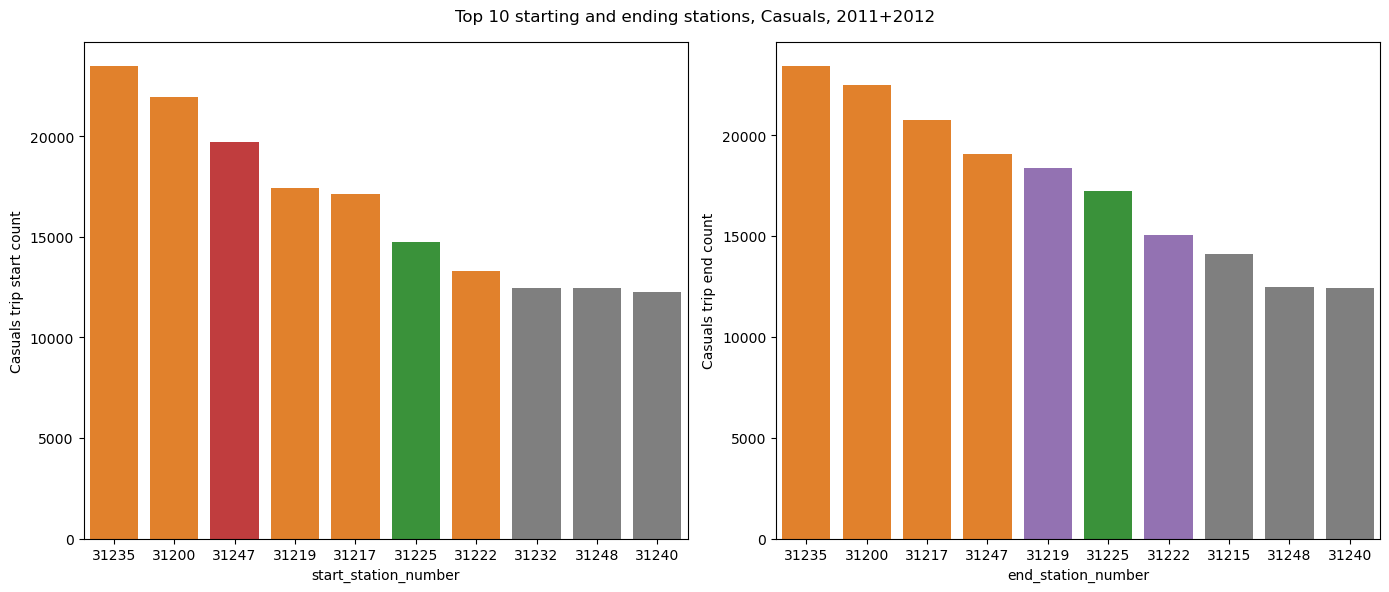

In [139]:
# top 10 stations for  asuals, starts and ends
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
'''casual_df=combi_td1112[combi_td1112['member_type'] == 'Casual']
member_df=combi_td1112[combi_td1112['member_type'] == 'Member']'''

sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='start_station_number', order=pd.value_counts(casual_df['start_station_number']
                                                                                                                          ).iloc[:10].index, ax=ax[0], palette=plt.cm.ScalarMappable(cmap='tab10').to_rgba(casual_df['start_station_number'])).set(ylabel='Casuals trip start count')
sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='end_station_number', order=pd.value_counts(casual_df['end_station_number']
                                                                                                                        ).iloc[:10].index, ax=ax[1], palette=plt.cm.ScalarMappable(cmap='tab10').to_rgba(casual_df['end_station_number'])).set(ylabel='Casuals trip end count')
fig.suptitle("Top 10 starting and ending stations, Casuals, 2011+2012")
plt.tight_layout()
plt.show()


In [ ]:
# top 10 stations for  casuals, starts and ends
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='start_station_number', order=pd.value_counts(casual_df['start_station_number']
                                                                                                                          ).iloc[:10].index, ax=ax[0], palette=plt.cm.ScalarMappable(cmap='tab10').to_rgba(casual_df['start_station_number'])).set(ylabel='Casuals trip start count')
sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='end_station_number', order=pd.value_counts(casual_df['end_station_number']
                                                                                                                        ).iloc[:10].index, ax=ax[1], palette=plt.cm.ScalarMappable(cmap='tab10').to_rgba(casual_df['start_station_number'])).set(ylabel='Casuals trip end count')
fig.suptitle("Top 10 starting and ending stations, Casuals, 2011+2012")
plt.tight_layout()
plt.show()

In [133]:
#top 10 all end stations
top_end=pd.value_counts(all_combi_df['end_station_number']).head(10)
top_end=pd.DataFrame(top_end)
top_end.pop('end_station_number')

top_end = top_end.rename_axis('end_station_number')
top_end

""
end_station_number
31200
31201
31623
31214
31101
31229
31228
31205
31613


In [137]:
#top 10 all start stations
top_start=pd.value_counts(all_combi_df['start_station_number']).head(10)
top_start=pd.DataFrame(top_start)
top_start.pop('start_station_number')

top_start = top_start.rename_axis('start_station_number')
top_start

""
start_station_number
31200
31623
31201
31214
31104
31101
31613
31229
31203


In [154]:
#top 10 casual start stations
top_casual_start_df=pd.value_counts(casual_df['start_station_number']).head(10)
top_casual_start_df=pd.DataFrame(top_casual_start_df)
top_casual_start_df.pop('start_station_number')

top_casual_start_df = top_casual_start_df.rename_axis('start_station_number')
top_casual_start_df

""
start_station_number
31235
31200
31247
31219
31217
31225
31222
31232
31248


In [157]:
#top 10 overall start stations
top_start_stx_df = pd.merge(top_start, all_combi_df, on=['start_station_number'], suffixes=('', '_y'))

top_start_stx_df.drop(list(top_start_stx_df.filter(regex='_y$')), axis=1, inplace=True)                                                                                                                                     
top_start_stx_df  = top_start_stx_df.drop_duplicates('add')
top_start_stx_df

,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec,end_lat,end_long
0,31200,Massachusetts Ave & Dupont Circle NW,"17th St and Massachusetts Ave NW, 17th Street ...",38.908150,-77.038361,277,2011-01-01 02:45:06,2011-01-01 02:49:44,Massachusetts Ave & Dupont Circle NW,31110,20th St & Florida Ave NW,W00220,Member,277,0.0,0.0
107162,31623,Columbus Circle / Union Station,"Columbus Circle / Union Station, F Street Nort...",38.897027,-77.004915,532,2011-01-01 02:40:09,2011-01-01 02:49:02,Columbus Circle / Union Station,31619,Lincoln Park / 13th & East Capitol St NE,W00153,Member,532,0.0,0.0
184912,31201,15th & P St NW,"15th & P St NW, Washington, DC 20005, United S...",38.909782,-77.034441,449,2011-01-01 00:45:55,2011-01-01 00:53:24,15th & P St NW,31202,14th & R St NW,W00506,Member,449,0.0,0.0
258619,31214,17th & Corcoran St NW,"17th & Corcoran St NW, 17th Street Northwest, ...",38.912057,-77.038667,347,2011-01-01 02:59:10,2011-01-01 03:04:57,17th & Corcoran St NW,31203,14th & Rhode Island Ave NW,W00220,Member,347,0.0,0.0
322121,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536,233,2011-01-01 00:28:26,2011-01-01 00:32:19,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233,0.0,0.0
384499,31101,14th & V St NW,"V Street Northwest, Greater U Street Historic ...",38.918116,-77.034394,302,2011-01-01 01:19:38,2011-01-01 01:24:41,14th & V St NW,31229,New Hampshire Ave & T St NW,W00512,Member,302,0.0,0.0
442855,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,Eastern Market Metro/Pennsylvania Ave & 7th St...,38.884056,-76.995262,361,2011-01-01 01:02:16,2011-01-01 01:08:17,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W00981,Member,361,0.0,0.0
498884,31229,New Hampshire Ave & T St NW,"New Hampshire Ave & T St NW, T Street Northwes...",38.915540,-77.038180,428,2011-01-01 01:07:54,2011-01-01 01:15:03,New Hampshire Ave & T St NW,31109,7th & T St NW,W00735,Member,428,0.0,0.0
554696,31203,14th & Rhode Island Ave NW,"14th and Rhode Island Ave NW, Rhode Island Ave...",38.908600,-77.032300,560,2011-01-01 00:35:48,2011-01-01 00:45:09,14th & Rhode Island Ave NW,31201,15th & P St NW,W00766,Member,560,0.0,0.0
604838,31110,20th St & Florida Ave NW,"20th St and Florida Ave NW, Florida Avenue Nor...",38.915400,-77.044600,482,2011-01-01 02:50:18,2011-01-01 02:58:20,20th St & Florida Ave NW,31214,17th & Corcoran St NW,W00220,Member,482,0.0,0.0


In [158]:
#now making a merged dataframe that'll have top 10 casual stations with latlongs
top_10_casualstart_stx_df= pd.merge(top_casual_start_df, all_combi_df, on=['start_station_number'], suffixes=('', '_y'))

top_10_casualstart_stx_df.drop(list(top_10_casualstart_stx_df.filter(regex='_y$')), axis=1, inplace=True)                                                                                                                                     
top_10_casualstart_stx_df  = top_10_casualstart_stx_df.drop_duplicates('add')
top_10_casualstart_stx_df


,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec,end_lat,end_long
0,31235,19th St & Constitution Ave NW,"19th St & Constitution Ave NW,Washington, DC 2...",38.892250,-77.042856,3954,2011-01-01 14:25:28,2011-01-01 15:31:23,19th St & Constitution Ave NW,31238,14th & G St NW,W00312,Casual,3954,0.000000,0.000000
35531,31200,Massachusetts Ave & Dupont Circle NW,"17th St and Massachusetts Ave NW, 17th Street ...",38.908150,-77.038361,277,2011-01-01 02:45:06,2011-01-01 02:49:44,Massachusetts Ave & Dupont Circle NW,31110,20th St & Florida Ave NW,W00220,Member,277,0.000000,0.000000
142693,31247,Jefferson Dr & 14th St SW,"Jefferson Dr & 14th St SW, Jefferson Drive Sou...",38.888550,-77.032450,3645,2012-03-16 12:31:51,2012-03-16 13:32:36,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,W01211,Casual,3645,38.888550,-77.032450
168579,31219,10th St & Constitution Ave NW,Constitution Avenue NW And 10th Street NW (Mus...,38.891931,-77.025990,1425,2011-01-01 11:46:11,2011-01-01 12:09:56,10th St & Constitution Ave NW,31211,Kennedy Center,W00225,Casual,1425,0.000000,0.000000
202261,31217,USDA / 12th & Independence Ave SW,"USDA / 12th and Independence Ave SW, Independe...",38.887197,-77.028289,2891,2011-01-01 11:47:06,2011-01-01 12:35:17,USDA / 12th & Independence Ave SW,31215,Georgetown Harbor / 30th St NW,W00997,Casual,2891,0.000000,0.000000
239041,31225,C & O Canal & Wisconsin Ave NW,"Wisconsin Avenue Northwest, Tenleytown, Washin...",38.946500,-77.078885,6505,2011-01-01 12:36:34,2011-01-01 14:25:00,C & O Canal & Wisconsin Ave NW,31225,C & O Canal & Wisconsin Ave NW,W00803,Casual,6505,38.946500,-77.078885
274584,31222,New York Ave & 15th St NW,"New York Ave & 15th St NW, New York Avenue Nor...",38.899036,-77.033353,919,2011-01-01 14:33:51,2011-01-01 14:49:11,New York Ave & 15th St NW,31217,USDA / 12th & Independence Ave SW,W00893,Member,919,0.000000,0.000000
311994,31232,7th & F St NW / National Portrait Gallery,"7th & F St NW / National Portrait Gallery, F S...",38.897329,-77.022309,367,2011-04-29 14:10:17,2011-04-29 14:16:25,7th & F St NW / National Portrait Gallery,31232,7th & F St NW / National Portrait Gallery,W00556,Member,367,38.897329,-77.022309
354206,31248,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,38.888739,-77.028444,183,2012-04-02 08:49:01,2012-04-02 08:52:04,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Smithsonian-National Mall / Jefferson Dr & 12t...,W00009,Member,183,38.888739,-77.028444
371552,31240,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,"Korean War Veterans Memorial, Daniel French Dr...",38.887839,-77.047749,3612,2012-03-16 09:57:40,2012-03-16 10:57:53,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31246,M St & Pennsylvania Ave NW,W00595,Casual,3612,0.000000,0.000000


In [138]:
#make a map of top 10 starting locations, all users
# import the library
import folium

# Make an empty map
topmap = folium.Map(location=(38.89996347562683, -77.03516744211487))
#show map

for i in range(0,len(full_station_df)):

   folium.CircleMarker(
      location=[full_station_df.iloc[i]['Lat'], full_station_df.iloc[i]['Lon']],
      radius=5,
      color='blue',
      opacity=0.5,
      fill_color='cornflowerblue',
      fill_opacity=0.3,
      popup=full_station_df.iloc[i]['start_station_number'],
      tooltip=full_station_df.iloc[i]['add']
   ).add_to(topmap)


for i in range(0,len(top_start_stx_df)):

   folium.Marker(
      location=[top_start_stx_df.iloc[i]['start_lat'], top_start_stx_df.iloc[i]['start_lon']],
      popup=top_start_stx_df.iloc[i]['start_station_number'],
      tooltip=top_start_stx_df.iloc[i]['add'],
      icon=folium.Icon(color="green", icon="play")
   ).add_to(topmap)
topmap.add_child(folium.LatLngPopup())
topmap

In [163]:
top_start_stx_df


,start_station_number,add,location,start_lat,start_lon,duration,start_date,end_date,start_station,end_station_number,end_station,bike_number,member_type,duration_sec,end_lat,end_long
0,31200,Massachusetts Ave & Dupont Circle NW,"17th St and Massachusetts Ave NW, 17th Street ...",38.908150,-77.038361,277,2011-01-01 02:45:06,2011-01-01 02:49:44,Massachusetts Ave & Dupont Circle NW,31110,20th St & Florida Ave NW,W00220,Member,277,0.0,0.0
107162,31623,Columbus Circle / Union Station,"Columbus Circle / Union Station, F Street Nort...",38.897027,-77.004915,532,2011-01-01 02:40:09,2011-01-01 02:49:02,Columbus Circle / Union Station,31619,Lincoln Park / 13th & East Capitol St NE,W00153,Member,532,0.0,0.0
184912,31201,15th & P St NW,"15th & P St NW, Washington, DC 20005, United S...",38.909782,-77.034441,449,2011-01-01 00:45:55,2011-01-01 00:53:24,15th & P St NW,31202,14th & R St NW,W00506,Member,449,0.0,0.0
258619,31214,17th & Corcoran St NW,"17th & Corcoran St NW, 17th Street Northwest, ...",38.912057,-77.038667,347,2011-01-01 02:59:10,2011-01-01 03:04:57,17th & Corcoran St NW,31203,14th & Rhode Island Ave NW,W00220,Member,347,0.0,0.0
322121,31104,Adams Mill & Columbia Rd NW,"Adams Mill and Columbia Rd NW, Columbia Road N...",38.923063,-77.042536,233,2011-01-01 00:28:26,2011-01-01 00:32:19,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233,0.0,0.0
384499,31101,14th & V St NW,"V Street Northwest, Greater U Street Historic ...",38.918116,-77.034394,302,2011-01-01 01:19:38,2011-01-01 01:24:41,14th & V St NW,31229,New Hampshire Ave & T St NW,W00512,Member,302,0.0,0.0
442855,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,Eastern Market Metro/Pennsylvania Ave & 7th St...,38.884056,-76.995262,361,2011-01-01 01:02:16,2011-01-01 01:08:17,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W00981,Member,361,0.0,0.0
498884,31229,New Hampshire Ave & T St NW,"New Hampshire Ave & T St NW, T Street Northwes...",38.915540,-77.038180,428,2011-01-01 01:07:54,2011-01-01 01:15:03,New Hampshire Ave & T St NW,31109,7th & T St NW,W00735,Member,428,0.0,0.0
554696,31203,14th & Rhode Island Ave NW,"14th and Rhode Island Ave NW, Rhode Island Ave...",38.908600,-77.032300,560,2011-01-01 00:35:48,2011-01-01 00:45:09,14th & Rhode Island Ave NW,31201,15th & P St NW,W00766,Member,560,0.0,0.0
604838,31110,20th St & Florida Ave NW,"20th St and Florida Ave NW, Florida Avenue Nor...",38.915400,-77.044600,482,2011-01-01 02:50:18,2011-01-01 02:58:20,20th St & Florida Ave NW,31214,17th & Corcoran St NW,W00220,Member,482,0.0,0.0


In [170]:
#make a map of top 10 CASUAL starting locations. casual starts are blue gamepads, registereds are green plays
# import the library
import folium

# Make an empty map
topmap2 = folium.Map(location=(38.89996347562683, -77.03516744211487))
#show map

for i in range(0,len(full_station_df)):

   folium.CircleMarker(
      location=[full_station_df.iloc[i]['Lat'], full_station_df.iloc[i]['Lon']],
      radius=5,
      color='blue',
      opacity=0.5,
      fill_color='cornflowerblue',
      fill_opacity=0.3,
      popup=full_station_df.iloc[i]['start_station_number'],
      tooltip=full_station_df.iloc[i]['add']
   ).add_to(topmap2)


for i in range(0,len(top_10_casualstart_stx_df)):

   folium.Marker(
      location=[top_10_casualstart_stx_df.iloc[i]['start_lat'], top_10_casualstart_stx_df.iloc[i]['start_lon']],
      popup=top_10_casualstart_stx_df.iloc[i]['start_station_number'],
      tooltip=top_10_casualstart_stx_df.iloc[i]['add'],
      icon=folium.Icon(color='blue',prefix='fa',icon='gamepad')
   ).add_to(topmap2)


for i in range(0,len(top_start_stx_df)):

   folium.Marker(
      location=[top_start_stx_df.iloc[i]['start_lat'], top_start_stx_df.iloc[i]['start_lon']],
      popup=top_start_stx_df.iloc[i]['start_station_number'],
      tooltip=top_start_stx_df.iloc[i]['add'],
      icon=folium.Icon(color="green", icon="play")
   ).add_to(topmap2)
   
topmap2.add_child(folium.LatLngPopup())
topmap2